# Vectorfitting

This is a from scratch pure python implementation of the fast relaxed vectorfitting algorithm for MIMO frequency domain data. Different modes (standard VF, relaxed VF and fast relaxed VF) are implemented. Matrix shaped frequency domain data is supported, and a model with common poles is fitted

$$ \mathbf{H}_{fit}(s) = \mathbf{D} + s \cdot \mathbf{E} + \sum_{k=1}^{n} \mathbf{R}_{k} \cdot \frac{1}{s - p_k} $$

where $\mathbf{D}$ is the constant term, $\mathbf{E}$ is the linear term and $\mathbf{R}_{k}$, $p_k$ are the (possibly complex) residues in matrix form and poles. 

## Example

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from vectorfitting import VecFit
from transferfunction import H_rng

In [5]:
#create random test data
Freq = np.linspace(0, 1000, 500)
H    = H_rng(shape=(2, 2), n_cpx=6, n_real=2, f_min=0, f_max=1000).evaluate(Freq)


In [6]:
#initialize vectorfitting engine
VF = VecFit(H, Freq, n_cpx=6, n_real=2, mode="fast_relax", smart=False, autoreduce=False, fit_Const=True, fit_Diff=True)

#run fitting procedure
VF.fit(tol=1e-3, max_steps=10, debug=True)

err_max  = 12.759986455682323
err_mean = 0.45924300619473796
err_max  = 0.5638168681141906
err_mean = 0.023082375097169424
err_max  = 0.01648028275113294
err_mean = 0.0012823360846710864
err_max  = 0.004482795444363178
err_mean = 0.0003645481069416049
err_max  = 0.006564979570699031
err_mean = 0.0003876664636241148
err_max  = 0.006638968315212133
err_mean = 0.00038736001491674444
err_max  = 0.006641591976707876
err_mean = 0.00038726987182811706
err_max  = 0.006639420551059769
err_mean = 0.00038720156165564766
err_max  = 0.006636819633279539
err_mean = 0.00038713510556181546
err_max  = 0.006634179502419058
err_mean = 0.0003870687941207088
err_max  = 0.00663153527719787
err_mean = 0.00038700247443170367
n_real = 0
n_cpx  = 7


Text(0, 0.5, 'mag in dB')

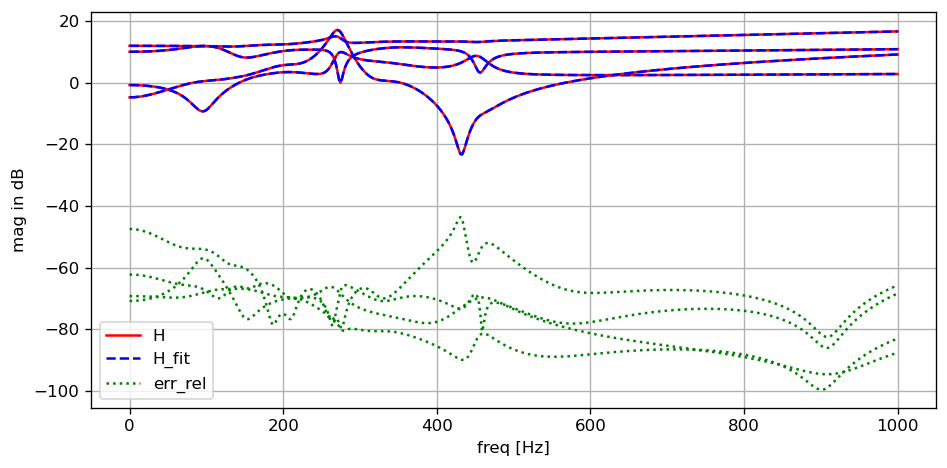

In [7]:
#evaluate fit
H_fit = VF.TF.evaluate(Freq)

#compute relative error
err_rel = (H - H_fit) / H

#dB helper
dB  = lambda x: 20*np.log10(abs(x))

#plot results
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8,4), tight_layout=True, dpi=120)

N, n, m = H.shape

for i in range(n):
    for j in range(m):
        ax.plot(Freq, dB(H[:,i,j]), "-", color="red", label="H" if i==j==0 else None)
        ax.plot(Freq, dB(H_fit[:,i,j]), "--", color="blue", label="H_fit" if i==j==0 else None)
        ax.plot(Freq, dB(err_rel[:,i,j]), ":", color="green", label="err_rel" if i==j==0 else None)
        
ax.grid(True)
ax.legend()
ax.set_xlabel("freq [Hz]")
ax.set_ylabel("mag in dB")

## References

[1] Gustavsen, B. and Adam Semlyen. “Rational approximation of frequency domain responses by vector fitting.” IEEE Transactions on Power Delivery 14 (1999): 1052-1061.

[2] B. Gustavsen, "Improving the pole relocating properties of vector fitting," in IEEE Transactions on Power Delivery, vol. 21, no. 3, pp. 1587-1592, July 2006, doi: 10.1109/TPWRD.2005.860281.

[3] D. Deschrijver, M. Mrozowski, T. Dhaene and D. De Zutter, "Macromodeling of Multiport Systems Using a Fast Implementation of the Vector Fitting Method," in IEEE Microwave and Wireless Components Letters, vol. 18, no. 6, pp. 383-385, June 2008, doi: 10.1109/LMWC.2008.922585.